# Census Income Prediction

Problem Statement

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)).

In the daset Income is the target variable which has two classes so it termed to be a Classification problem. Here the prediction task is to determine whether a person makes over $50K a year.



# Importing necessary libraries


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os
import scipy as stats
%matplotlib inline
warnings.filterwarnings('ignore')


# Importing the dataset


In [3]:
# Reading the csv file from dataset
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")
df


,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


The dataset contains the details of the annual income of the persons. In the dataset "Income" is the target variable which seems to be having two classes so it will be termed to be a "Classification Problem" where we need to predict whether the income of the person is over $50k per year or not.The dataset contains both numerical and categorical columns.



In [3]:
df.head(20)


,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


Showing the first 20 rows of the dataset.

Categorical Columns:

Workclass
Education
Marital_status
Occupation
Relationship
Race
Sex
Native_country
Income

Numerical Columns:(continuous)

Age
Fnlwgt(Final Weight): sampling weight
Education_num: Total number of years of education
Capital_gain: Income from investment sources other than salary/wages
Capital_loss: Income from investment sources other than salary/wages
Hours_per_week
In the dataset we can observe some corrupted data which is filled as ?, we can either drop this or we can fill this some numbers.



# Exploratory Data Analysis (EDA)


In [4]:
# Checking the dimension of dataset 
df.shape


(32560, 15)

The dataset contains 32560 rows and 15 columns. Out of 15 columns 14 are independent features and remaining one is our target column that is "Income".



In [5]:
# Checking the type of dataset
df.dtypes


Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

The datast contains 2 types of data namely integer type and object type. We will convert this object type data into numerical using encoding techniques before building the model.



In [7]:
# To get good overview of the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
# Checking number of unique values in each column
df.nunique().to_frame("No of unique values")


,No of unique values
Age,73
Workclass,9
Fnlwgt,21647
Education,16
Education_num,16
Marital_status,7
Occupation,15
Relationship,6
Race,5
Sex,2


In [9]:
# Checking null values in the dataframe
df.isnull().sum()


Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

There are no missing values in our database.

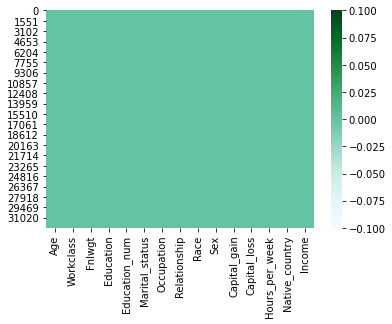

In [10]:
# Let's visualize the null values clearly
sns.heatmap(df.isnull(),cmap="BuGn")
plt.show()


In [11]:
# Checking how many columns are there in the dataset
df.columns


Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

Let's check the counts of each column to know which columns has ? sign and will take care of it.



In [12]:
# Checking the value counts of each columns
for i in df.columns:
        print(df[i].value_counts())
        print('****************************************')


36    898
31    888
34    886
23    877
35    876
     ... 
83      6
85      3
88      3
87      1
86      1
Name: Age, Length: 73, dtype: int64
****************************************
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
****************************************
123011    13
203488    13
164190    13
121124    12
148995    12
          ..
68318      1
284211     1
312881     1
177711     1
229376     1
Name: Fnlwgt, Length: 21647, dtype: int64
****************************************
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              4

Here the columns capital gain and capital loss have more than 90% of zeroes and it is not required for our prediction. Let's drop them.



In [4]:
# Dropping the columns having more number of 0's
df.drop("Capital_gain",axis=1,inplace=True)
df.drop("Capital_loss",axis=1,inplace=True)


The columns Workclass, Occupation and Native_country have ? sign, it is not NAN value but we need to fill it.



# Filling ? values


Since the columns having "?" are categorical so will fill "?" values with most frequently occuring values of the respective columns that is their mode values.



In [5]:
df['Workclass'] = df.Workclass.str.replace('?', 'Private')
df['Occupation'] = df.Occupation.str.replace('?', 'Prof-specialty')
df['Native_country'] = df.Native_country.str.replace('?', 'United-States')


Now we have replaced the ? values with mode. Let's check it.



In [6]:
df["Workclass"].value_counts()


 Private             24532
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [7]:
df["Occupation"].value_counts()


 Prof-specialty       5983
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In [8]:
df["Native_country"].value_counts()


 United-States                 29752
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France                           29
 

We can notice there are no ? sign in these columns means we have filled them.



# Feature engineering


Most of the columns have unique type of classes, let's replace them with the new classes.



In [9]:
df.Workclass=df.Workclass.replace([' Local-gov',' State-gov',' Federal-gov'],' Govt-Sector')
df.Workclass=df.Workclass.replace([' Private',' Self-emp-not-inc',' Self-emp-inc'],' Pvt-sector')
df.Workclass=df.Workclass.replace([' Without-pay',' Never-worked'],'Not-working')


In [10]:
df["Workclass"].value_counts()


 Pvt-sector     28189
 Govt-Sector     4350
Not-working        21
Name: Workclass, dtype: int64

In [11]:
df["Education"]=df["Education"].replace([' Preschool',' 1st-4th',' 5th-6th',' 7th-8th',' 9th',' 10th',' 11th',' 12th'],'School')
df["Education"]=df["Education"].replace([' HS-grad',' Prof-school'],' High-School')
df["Education"]=df["Education"].replace([' Some-college',' Assoc-voc',' Assoc-acdm'],' Secondary-School')
df["Education"]=df["Education"].replace([' Bachelors',],' Under_Graduation')
df["Education"]=df["Education"].replace([' Masters'],'Post_Graduation')
df["Education"]=df["Education"].replace([' Doctorate'],' PhD')


In [12]:
df["Education"].value_counts()


 High-School         11077
 Secondary-School     9740
 Under_Graduation     5354
School                4253
Post_Graduation       1723
 PhD                   413
Name: Education, dtype: int64

In [13]:
df["Marital_status"]=df["Marital_status"].replace([' Married-civ-spouse',' Married-AF-spouse'],' Married')
df["Marital_status"]=df["Marital_status"].replace([' Never-married'],' Single')
df["Marital_status"]=df["Marital_status"].replace([' Divorced',' Widowed',' Separated',' Married-spouse-absent',],' Others')


In [14]:
df["Marital_status"].value_counts()


 Married    14999
 Single     10682
 Others      6879
Name: Marital_status, dtype: int64

In [15]:
# Let's check the dataframe 
df.head()


,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,Pvt-sector,83311,Under_Graduation,13,Married,Exec-managerial,Husband,White,Male,13,United-States,<=50K
1,38,Pvt-sector,215646,High-School,9,Others,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
2,53,Pvt-sector,234721,School,7,Married,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
3,28,Pvt-sector,338409,Under_Graduation,13,Married,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
4,37,Pvt-sector,284582,Post_Graduation,14,Married,Exec-managerial,Wife,White,Female,40,United-States,<=50K


In [16]:
# Checking the list of value counts in Income
df['Income'].value_counts()


 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

There are two unique values in the target column <=50K and >50K. We can say that whether the person has annual income <=50K or >50K. We can also observe the class imbalancing issue here so will balance the data using SMOTE before machine learning modeling.



In [17]:
# Checking wheather the dataset contains any space
df.loc[df['Income']==" "]


,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income


It seems that there are no spaces in the dataset.



# Description of Dataset


In [18]:
# Statistical summary of dataset
df.describe()


,Age,Fnlwgt,Education_num,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,40.437469
std,13.640642,1.055498e+05,2.572709,12.347618
min,17.000000,1.228500e+04,1.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99.000000


This gives the statistical information of the dataset. The summary of this dataset looks perfect since there is no negative/ invalid values present.

From the above description we can observe the following things:

The counts of all the columns are same which means there is no missing values present in any columns.
The mean is grater than the meadian(50%) in some columns which means they are skewed to right.
The mean and the median(50%) are almost equal in Education_num and Hours_per_week which means the data is symmetric in these columns hence the data is normal and no skewness present here.
There is a huge difference in 75% and max it shows that huge outliers present in the columns.
In summarising the data we can observe that the dataset contains the person's age between 17 years to 90 years.
Let's Separate categorical and numerical columns



In [19]:
# checking for categorical columns
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)


['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']


In [20]:
# Now checking for numerical columns
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)


['Age', 'Fnlwgt', 'Education_num', 'Hours_per_week']


# Data Visualization


# Univariate Analysis


# Plotting categorical columns


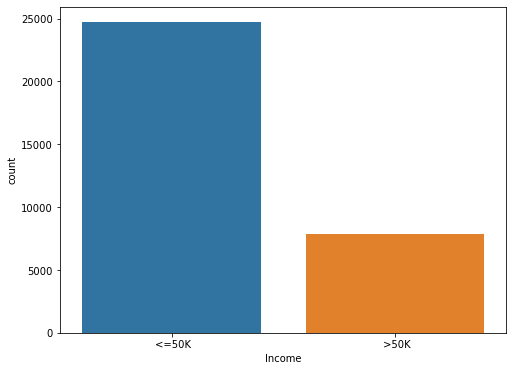

In [22]:
#Visualize the whether the income is above 50K or not
plt.figure(figsize=(8,6))
sns.countplot(df["Income"])
plt.show()


Most of the people have the income less than or equal to 50K. We can also observe the class imbalance so will balance the data before building our model.



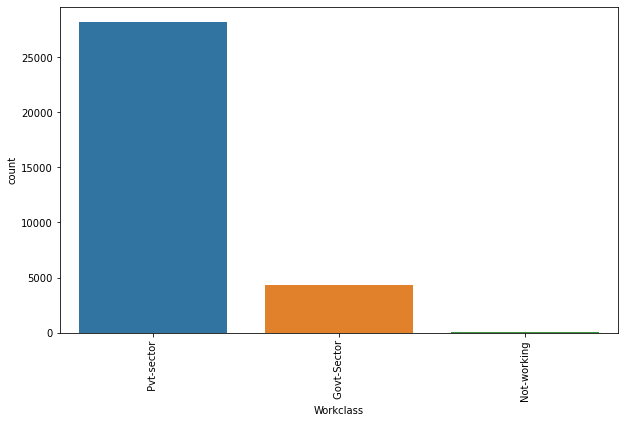

In [23]:
#Visualize the count of workclass of the people
plt.figure(figsize=(10,6))
sns.countplot(df["Workclass"])
plt.xticks(rotation=90)
plt.show()


The count of Private work class is high compare to others. This means the people working in private sectors are have high count and the people who never worked have least count.



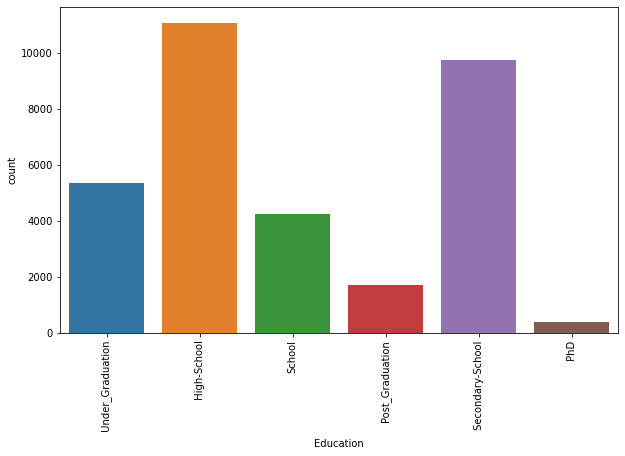

In [24]:
#Visualize the count Education of the people
plt.figure(figsize=(10,6))
sns.countplot(df["Education"])
plt.xticks(rotation=90)
plt.show()


The count of High-School is high followed by Secondary-School. Most of the people have their High School graduation with count more than 10K and the count of PhD is very less compare to others.



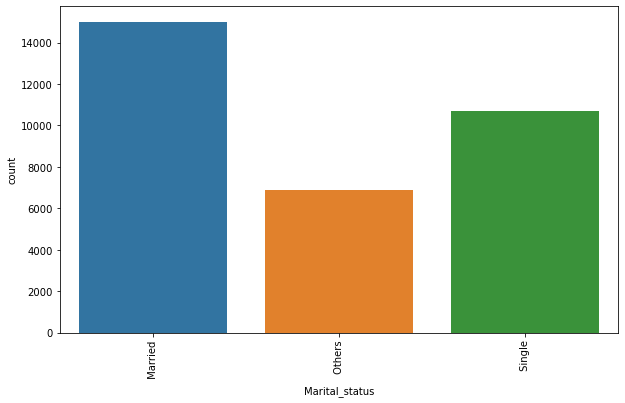

In [25]:
# Visualize the marital status of the people
plt.figure(figsize=(10,6))
sns.countplot(df["Marital_status"])
plt.xticks(rotation=90)
plt.show()


The people who got married have high counts followed by the Singles or never married people.



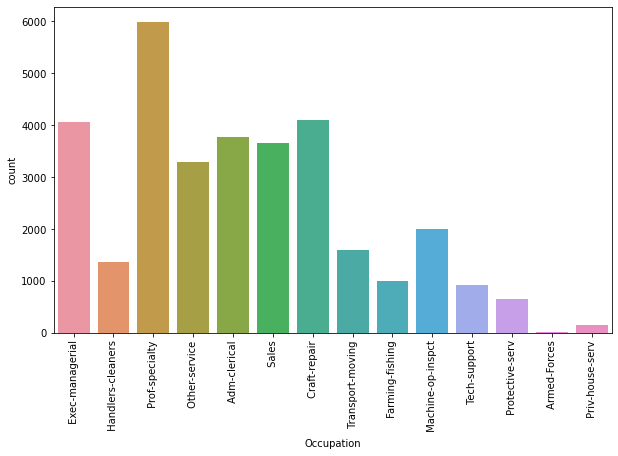

In [26]:
# Visualize the count of Occupation of the people
plt.figure(figsize=(10,6))
sns.countplot(df["Occupation"])
plt.xticks(rotation=90)
plt.show()


The people who are in the position of Prof-speciality have highest count and the people in the position Armed-Forces have very least counts.



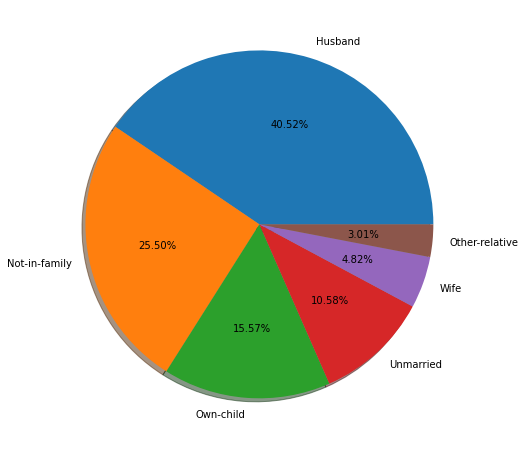

In [27]:
# Visualize the count of Relationship of the people
labels='Husband','Not-in-family','Own-child', 'Unmarried','Wife','Other-relative'
fig, ax = plt.subplots(figsize=(10,8))
ax.pie(df['Relationship'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()


The count is high in the Husband category which has around 40% of count and other relative has very least count around 3%.



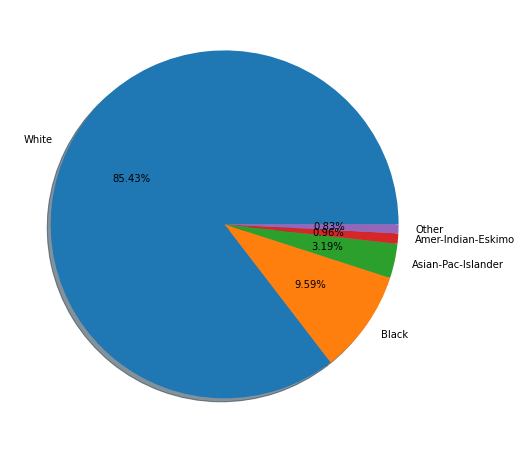

In [28]:
# Visualize the count of Race of the people

labels='White','Black','Asian-Pac-Islander', 'Amer-Indian-Eskimo','Other'
fig, ax = plt.subplots(figsize=(10,8))
ax.pie(df['Race'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()


White family groups have high count of around 85% and Other race have least count around 0.83%.



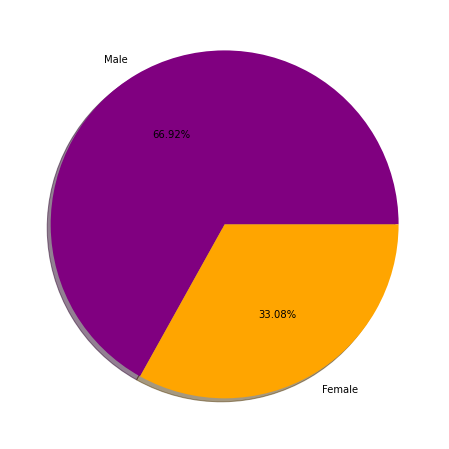

In [29]:
# Visualize the count of Sex group of the people
labels='Male','Female'
fig, ax = plt.subplots(figsize=(10,8))
colors = ["purple","orange"]
ax.pie(df['Sex'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True,colors=colors)
plt.show()


The count of Male is high and has around 66% and only 33% of females are there.



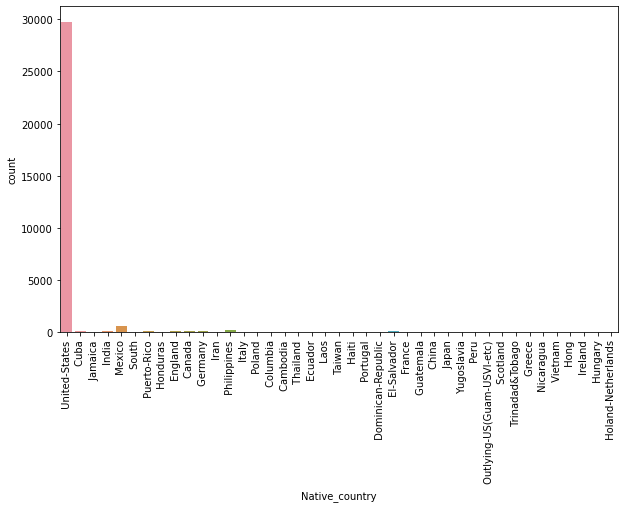

In [30]:
# Visualizing the Native country of the people
plt.figure(figsize=(10,6))
sns.countplot(df["Native_country"])
plt.xticks(rotation=90)
plt.show()


The United States country has highest count of around 29K and other countries have very less counts.



# Distribution of skewness


# Plotting numerical columns


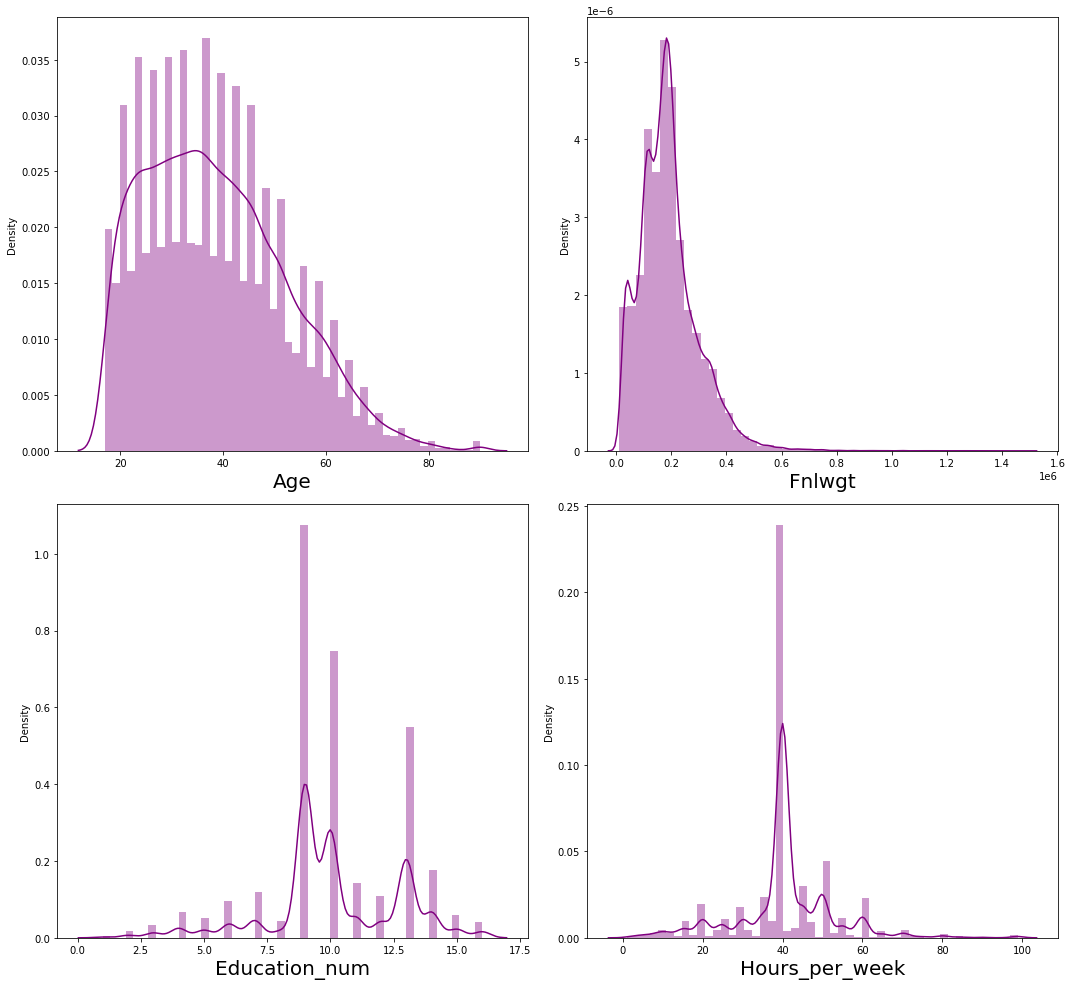

In [31]:
# Checking how the data has been distriubted in each column

plt.figure(figsize=(15,20),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=6:
        ax=plt.subplot(3,2,plotnumber)
        sns.distplot(df[column],color="purple")
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()


From the above distribution plot it can be inferred that Age column seems to be normal but the mean is more than the median so it is skewed to right.

The data is not normal in the above columns and the columns final weight, capital gain and capital loss have right skewness since the mean is more in this case.

The data in the columns Education num and Hoursper week are not normal but they have no skewness.


# Bivariate Analysis


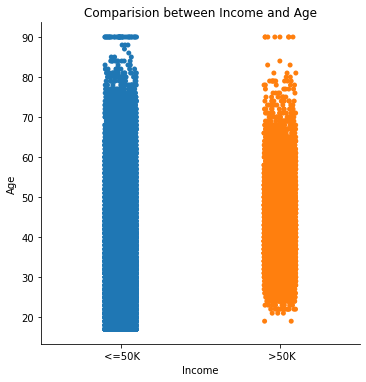

In [32]:
# Visualizing the age of the people who have the income more
sns.catplot(df['Income'],df['Age'], data=df,kind="strip",size=5);
plt.title('Comparision between Income and Age')
plt.show()


The people whose age is between 20 to 80 have annual income more than 50K.



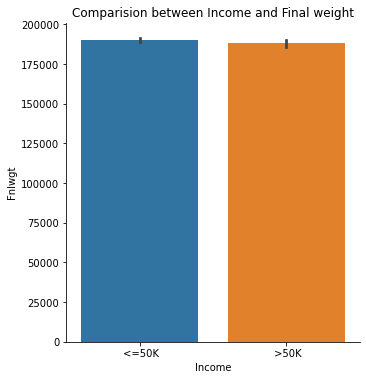

In [33]:
# Visualizing the Final weight with income
sns.catplot(df['Income'],df['Fnlwgt'], data=df,kind='bar');
plt.title('Comparision between Income and Final weight')
plt.show()


There is no significant relation between final weight and income of the people.



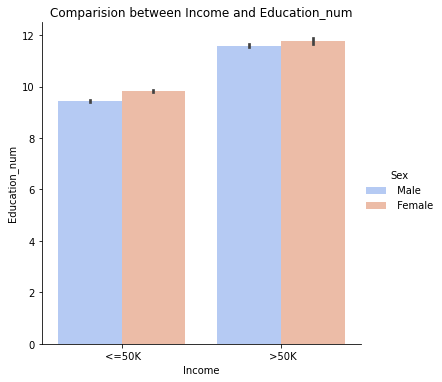

In [34]:
# Visualizing the number of education with income
sns.catplot(x='Income',y='Education_num', data=df,kind='bar',hue="Sex",palette="coolwarm")
plt.title('Comparision between Income and Education_num')
plt.show()


The Income is more than 50K for the people having high education number. Here both gender have the income more than 50K.



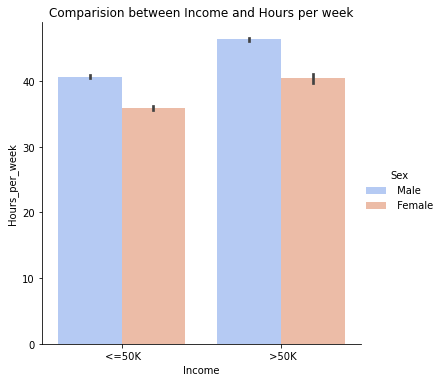

In [35]:
# Visualizing the number of Hours per week with income
sns.catplot(x='Income',y='Hours_per_week', data=df,kind='bar',hue="Sex",palette="coolwarm");
plt.title('Comparision between Income and Hours per week')
plt.show()


This shows how the income is related to the hours per week. The income is >50K when the Hours is high for both male and female.



<Figure size 720x432 with 0 Axes>

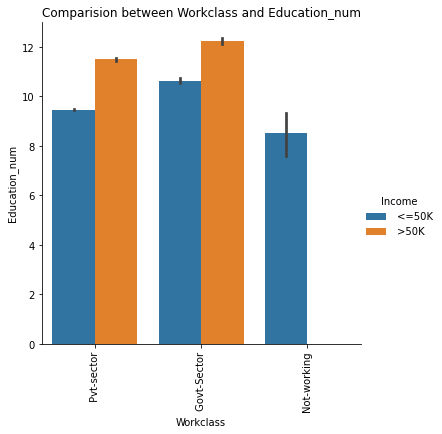

In [36]:
# Visualizing how the income changes with work class of the people
plt.figure(figsize=(10,6))
sns.catplot(x='Workclass',y='Education_num', data=df,kind='bar',hue="Income");
plt.title('Comparision between Workclass and Education_num')
plt.xticks(rotation=90)
plt.show()


The people in the position of government jobs with high education number have the income >50K also the people in the Private sector position with average education number have second highest income >50K.



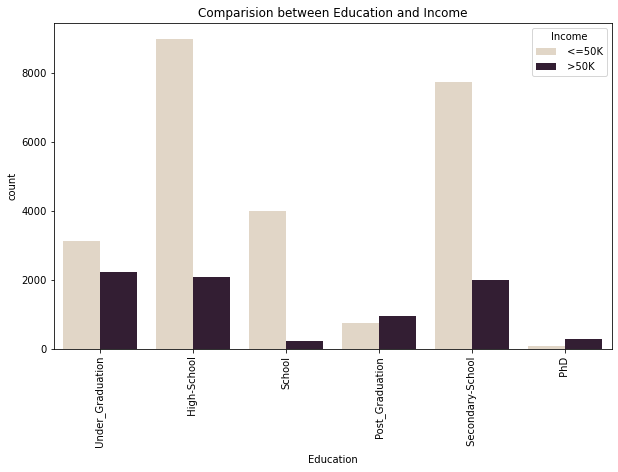

In [37]:
# Visualizing the relation between Education and Income of the people
plt.figure(figsize=(10,6))
sns.countplot(df["Education"],hue=df["Income"],palette="ch:.25" )
plt.title("Comparision between Education and Income")
plt.xticks(rotation=90)
plt.show()


The people who completed theie high school have income <=50K followed by the people who done their Secondary School. Also the people who done their Graduation they are earning more income that is >50K.



<Figure size 720x432 with 0 Axes>

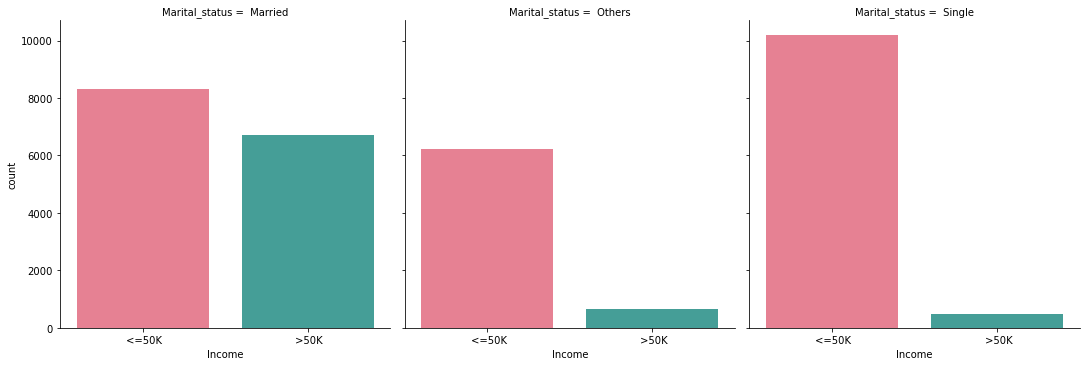

In [38]:
# Visualizing the relation between Marital status and Income of the people
plt.figure(figsize=(10,6))
sns.catplot(x='Income',col='Marital_status',data=df,kind='count',palette="husl")
plt.show()


The people who are married they have the income >50K compare to others.
The people who are staying singles earning <=50K income.


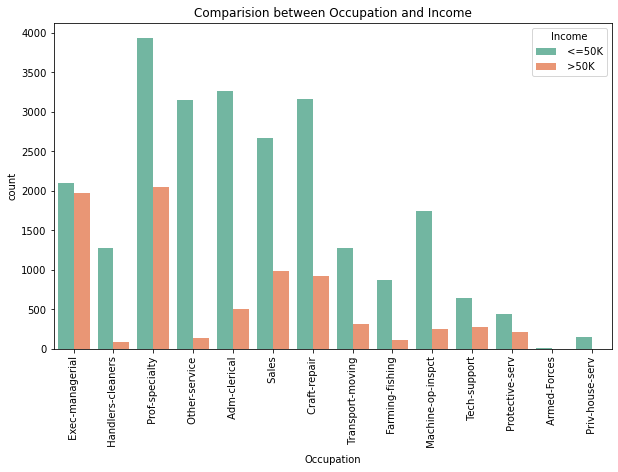

In [39]:
# Visualizing the relation between Occupation and Income of the people
plt.figure(figsize=(10,6))
sns.countplot(df["Occupation"],hue=df["Income"],palette="Set2" )
plt.title("Comparision between Occupation and Income")
plt.xticks(rotation=90)
plt.show()


The people in the position Prof-speciality and Exce-managerial have the income more than 50K.
Also the people who are in the position Prof_Speciality, Other services, Adm-clerical and craft repair they have income less than 50K.


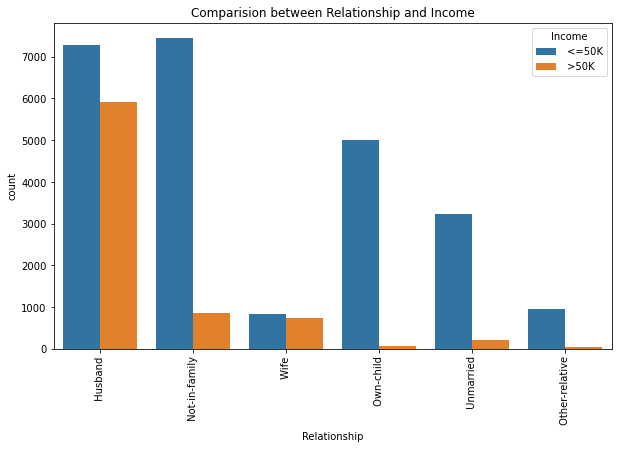

In [40]:
# Visualizing the relation between Relationship and Income of the people
plt.figure(figsize=(10,6))
sns.countplot(df["Relationship"],hue=df["Income"] )
plt.title("Comparision between Relationship and Income")
plt.xticks(rotation=90)
plt.show()


People who have the relationship of husband and wife have income >50K and the others relationship giving income <=50K.



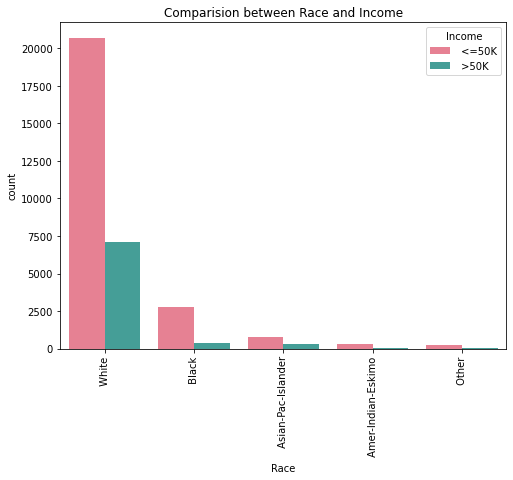

In [41]:
# Visualizing the relation between Race and Income of the people
plt.figure(figsize=(8,6))
sns.countplot(df['Race'],hue=df['Income'],data=df,palette="husl")
plt.title("Comparision between Race and Income")
plt.xticks(rotation=90)
plt.show()


The white family groups have high income >50K compare ro other racial groups.



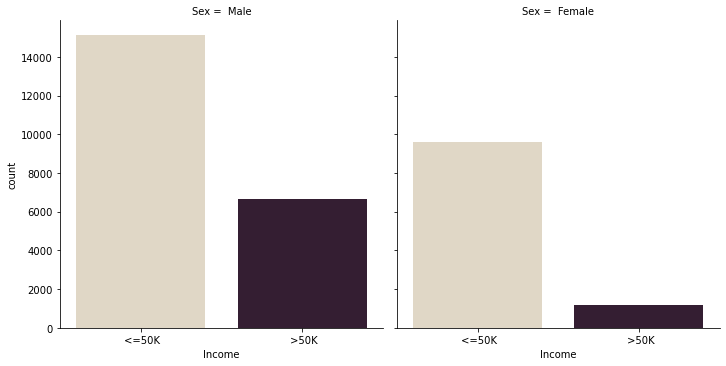

In [42]:
# Visualizing the relation between Income and Sex groups of the people
sns.catplot(x='Income',col='Sex',data=df,kind='count',palette="ch:.28")
plt.show()


The income of Male is above 50K compared to the female.



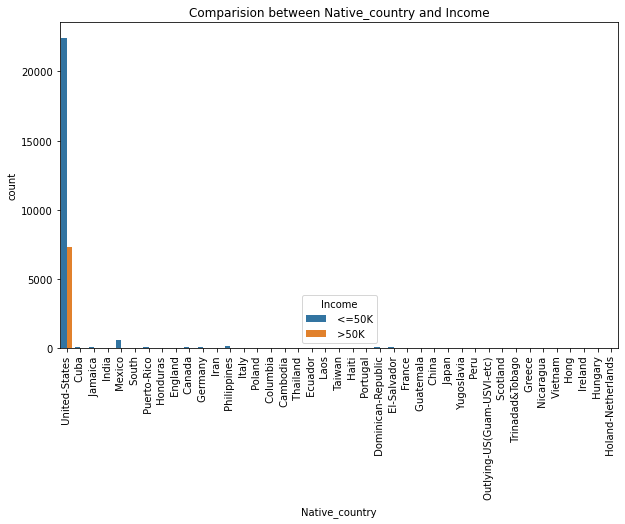

In [43]:
# Visualizing the relation between Native country and Income of the people
plt.figure(figsize=(10,6))
sns.countplot(df["Native_country"],hue=df["Income"] )
plt.title("Comparision between Native_country and Income")
plt.xticks(rotation=90)
plt.show()


United States earning more income compared to all the other countries.



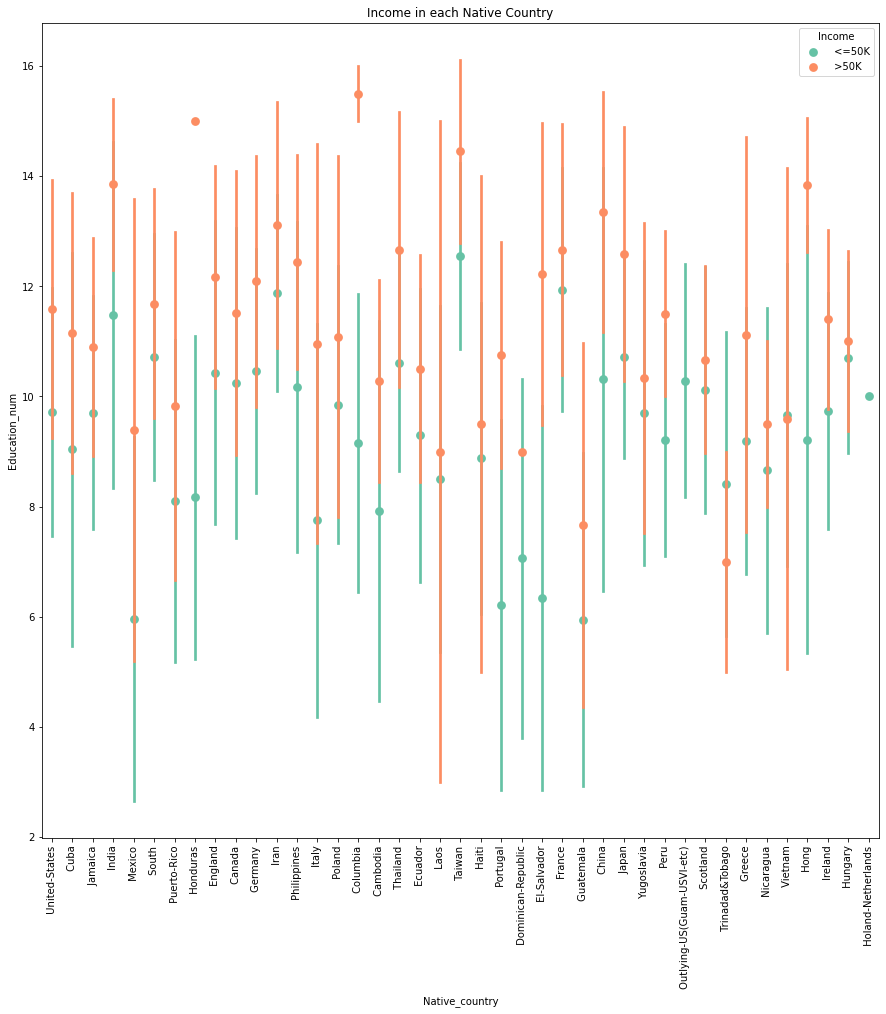

In [44]:
# Visualizing how the income changes for Native country of the people
plt.figure(figsize=(15,15))
plt.title("Income in each Native Country")
sns.pointplot(x='Native_country',y='Education_num',data=df, hue='Income',join=False,palette="Set2",ci="sd")
plt.xticks(rotation=90)
plt.show()


The countries having high education numbers have high income that is more than 50K.



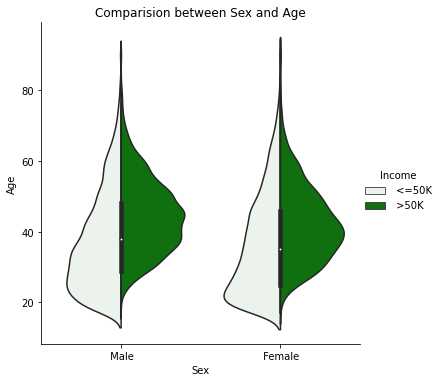

In [45]:
# Visualizing the relationship between Sex and Age of the people

sns.catplot(x="Sex", y="Age", kind="violin",color="g", data=df,hue="Income",split=True)
plt.title("Comparision between Sex and Age")
plt.show()


The income of male with age 17-55 have the income >50K compared to the female.



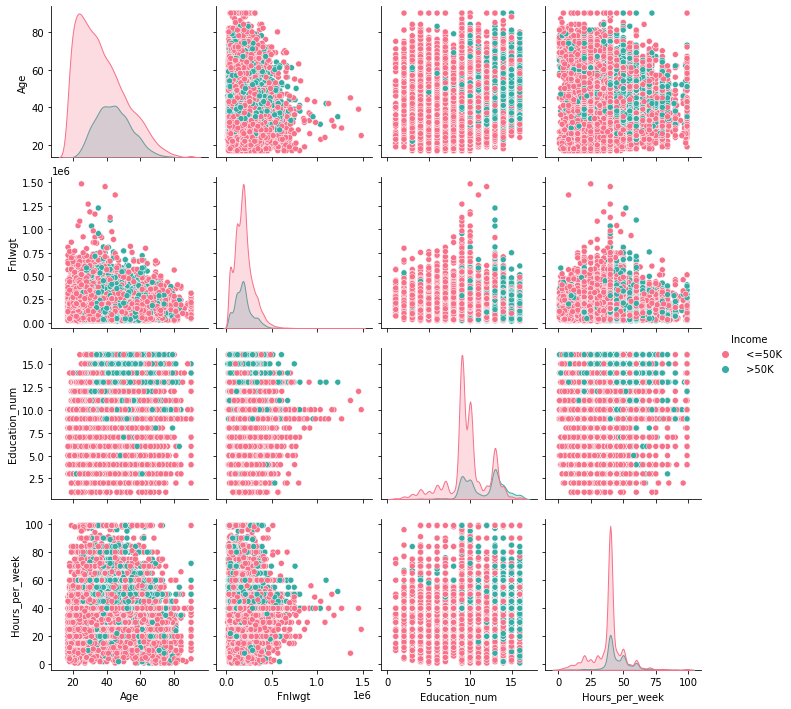

In [46]:
# Checking the pairwise relation in the dataset.
sns.pairplot(df,hue="Income",palette="husl")


This pair plot gives the pairwise relation between the columns which is plotted on the basis of target variable "Income". Here we can observe the relation between the features and label.
Most of features are highly correlated with each other.
Some of the features have outliers and skewness, will remove them later.


# Identifying the outliers


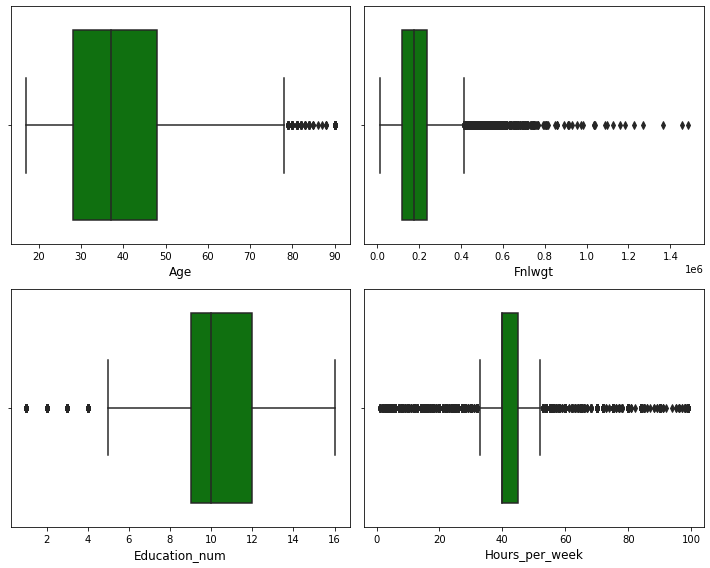

In [47]:
# Identifying the outliers using boxplot

plt.figure(figsize=(10,8),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(df[column],color="g")
        plt.xlabel(column,fontsize=12)
    plotnumber+=1
plt.tight_layout()


The outliers present in all the columns we will remove it using Zscore method.



# Removing outliers


# 1.Zscore method


In [48]:
# Features containing outliers
features = df[["Age","Fnlwgt","Education_num","Hours_per_week"]]

# Using zscore to remove outliers
from scipy.stats import zscore

z=np.abs(zscore(features))

z


array([[0.83709708, 1.0087417 , 1.13477863, 2.22212013],
       [0.04264043, 0.24504633, 0.42002663, 0.03542999],
       [1.05703146, 0.42576955, 1.19742926, 0.03542999],
       ...,
       [1.42358875, 0.3588108 , 0.42002663, 0.03542999],
       [1.21562378, 0.11092744, 0.42002663, 1.65520046],
       [0.98372   , 0.92986178, 0.42002663, 0.03542999]])

Now we have removed the outliers using Zscore method.



In [49]:
# Creating new dataframe
new_df = df[(z<3).all(axis=1)] 
new_df


,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,Pvt-sector,83311,Under_Graduation,13,Married,Exec-managerial,Husband,White,Male,13,United-States,<=50K
1,38,Pvt-sector,215646,High-School,9,Others,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
2,53,Pvt-sector,234721,School,7,Married,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
3,28,Pvt-sector,338409,Under_Graduation,13,Married,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
4,37,Pvt-sector,284582,Post_Graduation,14,Married,Exec-managerial,Wife,White,Female,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Pvt-sector,257302,Secondary-School,12,Married,Tech-support,Wife,White,Female,38,United-States,<=50K
32556,40,Pvt-sector,154374,High-School,9,Married,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
32557,58,Pvt-sector,151910,High-School,9,Others,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K
32558,22,Pvt-sector,201490,High-School,9,Single,Adm-clerical,Own-child,White,Male,20,United-States,<=50K


In [50]:
# Shape of original dataset
df.shape


(32560, 13)

Before removing the outliers we had 32560 rows and 13 columns in our dataset.



In [51]:
# Shape of new dataframe
new_df.shape


(31461, 13)

After removing the outliers we have 31461 rows and 13 columns.



In [52]:
# Checking the the data loss
data_loss = (32560-31461)/36560*100
data_loss


3.0060175054704596

Here we are losing only 3% data hence removing outliers.



# 2. IQR (Inter Quantile Range) method


In [53]:
# 1st quantile
Q1=features.quantile(0.25)

# 3rd quantile
Q3=features.quantile(0.75)

# IQR
IQR=Q3 - Q1

df1=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]


In [54]:
df1.shape


(21950, 13)

Using IQR method the dataframe has 21950 rows and 13 columns.



In [55]:
# Checking the the data loss
data_loss = (32560-21950)/36560*100
data_loss


29.02078774617068

Using IQR method I am losing 29% of data, so considering Zscore method.



# Checking the skewness


In [56]:
# Checking the skewness
new_df.skew()


Age               0.472279
Fnlwgt            0.634828
Education_num    -0.159752
Hours_per_week   -0.341724
dtype: float64

We can find the skewness in the column Fnlwgt, let's remove it using cube root method.



# Removing skewness


In [57]:
# Removing skewness using cube root method
new_df["Fnlwgt"] = np.cbrt(df["Fnlwgt"])


In [58]:
new_df.skew()


Age               0.472279
Fnlwgt           -0.376609
Education_num    -0.159752
Hours_per_week   -0.341724
dtype: float64

Now the skewness has been removed



<AxesSubplot:xlabel='Fnlwgt', ylabel='Density'>

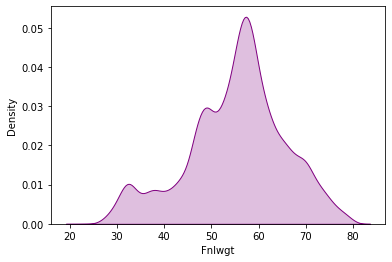

In [59]:
# After removing let's check how the data has been distributed in each column.

sns.distplot(new_df["Fnlwgt"],color="purple",kde_kws={"shade": True},hist=False)


The data is almost normal and has no skewness.



# Encoding the categorical columns using Label Encoding


In [60]:
categorical_col = ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']

from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
new_df[categorical_col]= new_df[categorical_col].apply(LE.fit_transform)


In [61]:
new_df[categorical_col]


,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
0,1,3,0,3,0,4,1,38,0
1,1,0,1,5,1,4,1,38,0
2,1,5,0,5,0,2,1,38,0
3,1,3,0,9,5,2,0,4,0
4,1,4,0,3,5,4,0,38,0
...,...,...,...,...,...,...,...,...,...
32555,1,2,0,12,5,4,0,38,0
32556,1,0,0,6,0,4,1,38,1
32557,1,0,1,0,4,4,0,38,0
32558,1,0,2,0,3,4,1,38,0


Categorical columns after encoing the data using label encoding method.



# Correlation between the target variable and independent variables using HEAT map


In [62]:
# Checking the correlation between features and the target
cor = new_df.corr()
cor


,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
Age,1.000000,-0.083618,-0.062328,-0.009682,0.053361,-0.476050,-0.001321,-0.268028,0.030679,0.091664,0.097510,-0.001039,0.248351
Workclass,-0.083618,1.000000,0.021707,-0.035701,-0.161488,0.034265,0.005610,0.001008,0.051670,0.036158,-0.006349,-0.031665,-0.062963
Fnlwgt,-0.062328,0.021707,1.000000,0.007806,-0.031874,0.030462,0.001524,0.009060,-0.006959,0.023307,-0.015820,-0.061390,-0.002780
Education,-0.009682,-0.035701,0.007806,1.000000,-0.052888,0.037934,0.068764,0.001954,-0.005373,0.001626,-0.053121,-0.073192,0.034278
Education_num,0.053361,-0.161488,-0.031874,-0.052888,1.000000,-0.071406,0.073927,-0.102497,0.030849,0.016662,0.160483,0.054510,0.337595
Marital_status,-0.476050,0.034265,0.030462,0.037934,-0.071406,1.000000,0.001052,0.451130,-0.081701,-0.336209,-0.241789,0.009096,-0.425904
Occupation,-0.001321,0.005610,0.001524,0.068764,0.073927,0.001052,1.000000,-0.037549,-0.004094,0.047864,-0.019943,-0.003666,0.034612
Relationship,-0.268028,0.001008,0.009060,0.001954,-0.102497,0.451130,-0.037549,1.000000,-0.115216,-0.582940,-0.263412,-0.010871,-0.251506
Race,0.030679,0.051670,-0.006959,-0.005373,0.030849,-0.081701,-0.004094,-0.115216,1.000000,0.088642,0.045331,0.122051,0.072451
Sex,0.091664,0.036158,0.023307,0.001626,0.016662,-0.336209,0.047864,-0.582940,0.088642,1.000000,0.239039,0.002060,0.216665


This gives the correlation between the denpendent and independent variables. We can visualize this by plotting heat map.



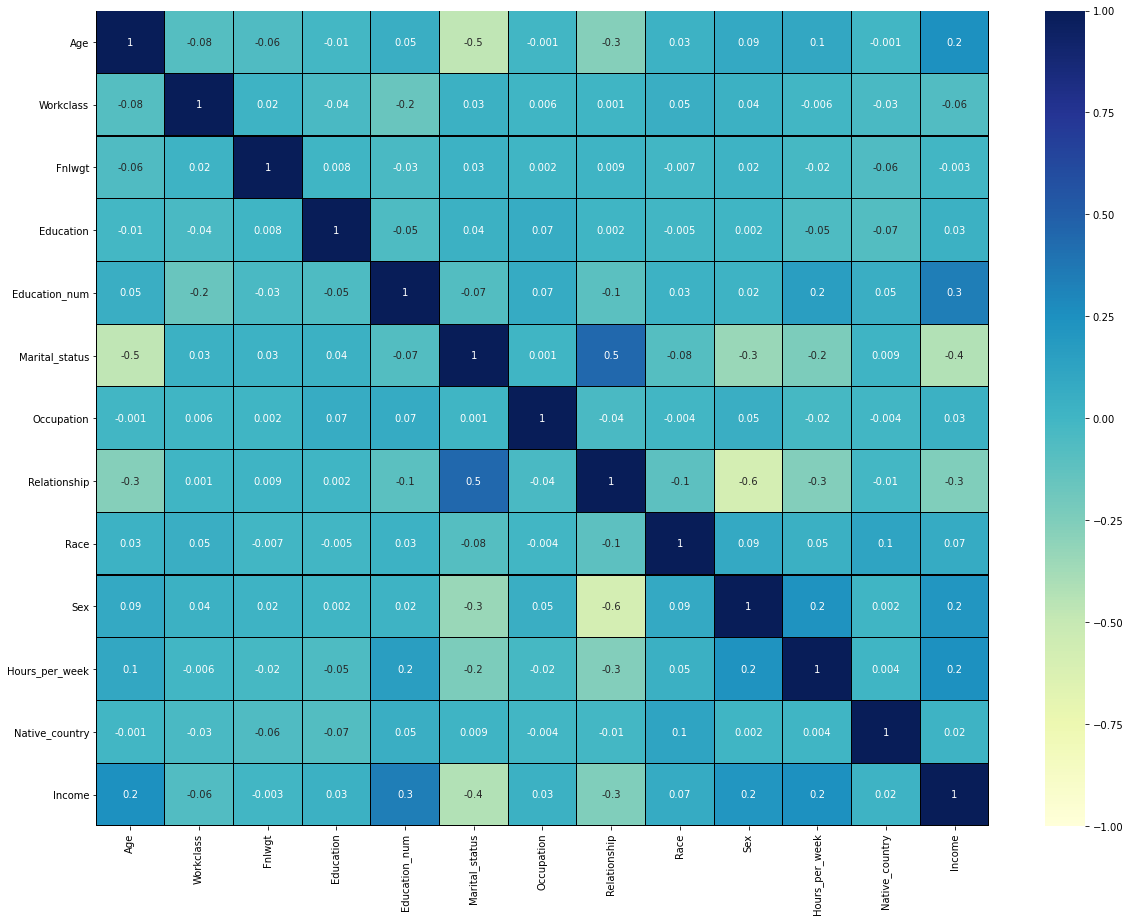

In [69]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(20,15))
sns.heatmap(new_df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g', annot = True, linecolor="black",annot_kws={'size':10},cmap="YlGnBu")
plt.yticks(rotation=0);


This heatmap shows the correlation matrix by visualizing the data.
we can observe the relation between one feature to other:

    This heat map contains both positive and negative correlation.
    There is no much correlation between the target and the label.
    The columns Education_num, Age, Sex and Hours_per_week have positive correlation with the target.
    The columns Marital status and Relationship have less correlation with the label.
    The columns Relationship and Sex are highly correlated with each other also the column Fnlwgt has very less relation with    the label so we can drop these columns if necessary.
    There is no multicollinearity issue exists in the data so no need to worry much.


In [65]:
cor['Income'].sort_values(ascending=False)


Income            1.000000
Education_num     0.337595
Age               0.248351
Hours_per_week    0.242383
Sex               0.216665
Race              0.072451
Occupation        0.034612
Education         0.034278
Native_country    0.017698
Fnlwgt           -0.002780
Workclass        -0.062963
Relationship     -0.251506
Marital_status   -0.425904
Name: Income, dtype: float64

Here we can easily find the positive and negative correlation between the features and the label.



# Visualizing the correlation between label and features using bar plot


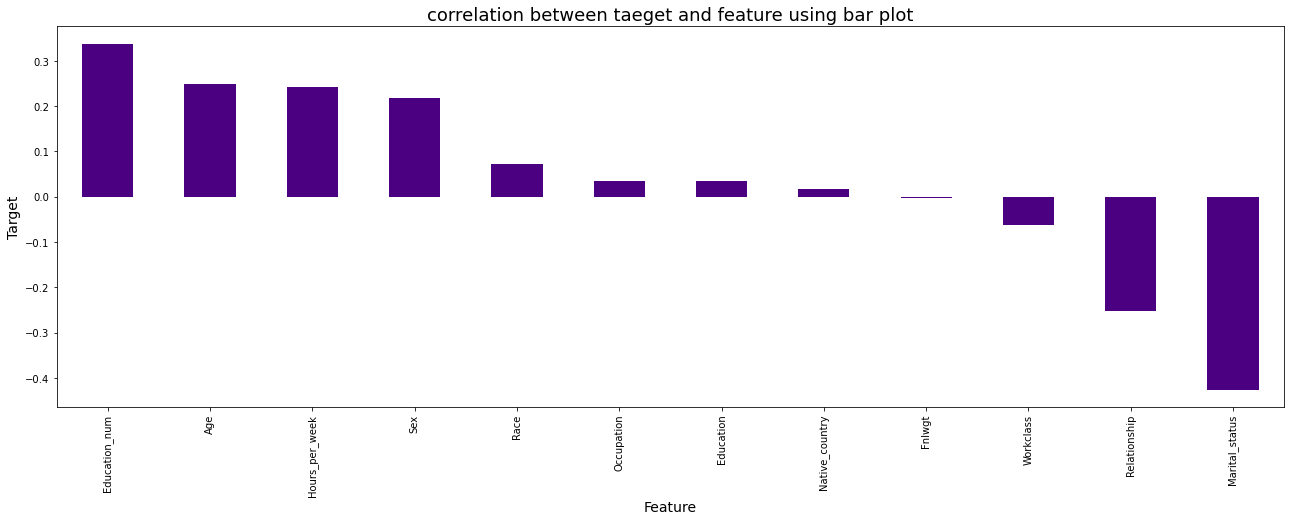

In [67]:
plt.figure(figsize=(22,7))
new_df.corr()['Income'].sort_values(ascending=False).drop(['Income']).plot(kind='bar',color='indigo')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Target',fontsize=14)
plt.title('correlation between taeget and feature using bar plot',fontsize=18)
plt.show()


The column Fnlwgt has very less correlation with the label so we can drop it.



In [74]:
df.drop("Fnlwgt",axis=1,inplace=True)


# Separating the features and label variables into x and y


In [75]:
x = new_df.drop("Income", axis=1)
y = new_df["Income"]


In [76]:
# Dimension of x
x.shape


(31461, 12)

In [77]:
# Dimension of y
y.shape


(31461,)

# Feature Scaling using Standard Scalarization


In [78]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x


,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country
0,0.875057,0.392103,-1.102052,0.621080,1.154324,-0.990371,-0.784335,-0.903178,0.391304,0.706601,-2.424121,0.254062
1,-0.025350,0.392103,0.464976,-1.149684,-0.459657,0.147158,-0.282327,-0.281938,0.391304,0.706601,-0.008364,0.254062
2,1.100158,0.392103,0.630260,1.801589,-1.266647,-0.990371,-0.282327,-0.903178,-1.969806,0.706601,-0.008364,0.254062
3,-0.775689,0.392103,1.399791,0.621080,1.154324,-0.990371,0.721690,2.203019,-1.969806,-1.415226,-0.008364,-5.457546
4,-0.100384,0.392103,1.023711,1.211335,1.557819,-0.990371,-0.784335,2.203019,0.391304,-1.415226,-0.008364,0.254062
...,...,...,...,...,...,...,...,...,...,...,...,...
31456,-0.850723,0.392103,0.814728,0.030825,0.750829,-0.990371,1.474703,2.203019,0.391304,-1.415226,-0.187309,0.254062
31457,0.124718,0.392103,-0.143169,-1.149684,-0.459657,-0.990371,-0.031323,-0.903178,0.391304,0.706601,-0.008364,0.254062
31458,1.475327,0.392103,-0.170768,-1.149684,-0.459657,0.147158,-1.537348,1.581780,0.391304,-1.415226,-0.008364,0.254062
31459,-1.225892,0.392103,0.335900,-1.149684,-0.459657,1.284688,-1.537348,0.960541,0.391304,0.706601,-1.797814,0.254062


I have scaled the data using standard scalarizaion method to overcome with the issue of data biasness.



In [79]:
y.value_counts()


0    23853
1     7608
Name: Income, dtype: int64

Here we can notice the class imbalancing issue so lets uae SMOTE to balance the data



# Oversampling

In [80]:
# Oversampling the data
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x, y = SM.fit_resample(x,y)


In [81]:
y.value_counts()


1    23853
0    23853
Name: Income, dtype: int64

The data is balanced now, Since the highest count of the target is 23853 so the data is balanced by oversampling all the classes to the count 23853.



In [83]:
# DataFrame after preprocessing and data cleaning
new_df.head()


,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,1,43.675121,3,13,0,3,0,4,1,13,38,0
1,38,1,59.967204,0,9,1,5,1,4,1,40,38,0
2,53,1,61.685627,5,7,0,5,0,2,1,40,38,0
3,28,1,69.686283,3,13,0,9,5,2,0,40,4,0
4,37,1,65.776255,4,14,0,3,5,4,0,40,38,0


We have done with the preprocessing and data cleaning. Now let's move to build the model.



# Modeling


# Finding best random state


In [84]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    DTC = DecisionTreeClassifier()
    DTC.fit(x_train, y_train)
    pred = DTC.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)


Best accuracy is  0.8395751816657351  on Random_state  30


THe best accuracy is 83.95% at the random state 30

# Creating train_test split


In [85]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)


# Classification Algorithms


In [92]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as KNN
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score


# Decision Tree Classifier


In [93]:
# Checking Accuracy for Decision Tree Classifier
DTC = DecisionTreeClassifier()
DTC.fit(x_train,y_train)

#Prediction
predDTC = DTC.predict(x_test)

print(accuracy_score(y_test, predDTC))
print(confusion_matrix(y_test, predDTC))
print(classification_report(y_test,predDTC))


0.8402738960313024
[[5995 1264]
 [1022 6031]]
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      7259
           1       0.83      0.86      0.84      7053

    accuracy                           0.84     14312
   macro avg       0.84      0.84      0.84     14312
weighted avg       0.84      0.84      0.84     14312



The accuracy using Decision Tree Classifer is 84%.



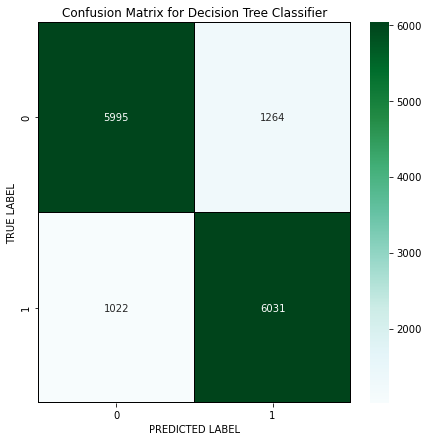

In [94]:
# Lets plot confusion matrix for DTC
cm = confusion_matrix(y_test,predDTC)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()


This is the confusion matrix for Decision Tree classifier where we can observe the true positive rate, false positive rate, true negative rate and false negative rate. And is plotted predicted value againt True values.



# Random Forest Classifier


In [95]:
# Checking accuracy for Random Forest Classifier
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)

# Prediction
predRFC = RFC.predict(x_test)

print(accuracy_score(y_test, predRFC))
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test,predRFC))


0.878703186137507
[[6191 1068]
 [ 668 6385]]
              precision    recall  f1-score   support

           0       0.90      0.85      0.88      7259
           1       0.86      0.91      0.88      7053

    accuracy                           0.88     14312
   macro avg       0.88      0.88      0.88     14312
weighted avg       0.88      0.88      0.88     14312



The accuracy using Random Forest Classifier is 87.87%



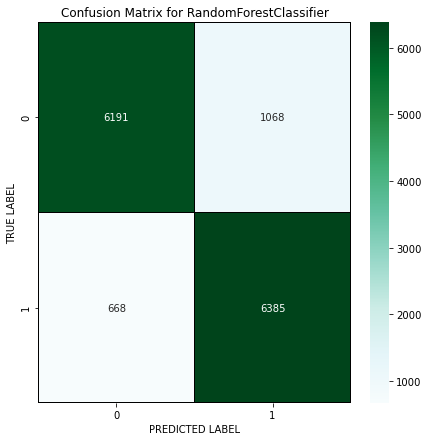

In [96]:
# Lets plot confusion matrix for RandomForestClassifier
cm = confusion_matrix(y_test,predRFC)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for RandomForestClassifier')
plt.show()


# Logistic Regression


In [97]:
# Checking accuracy for Logistic Regression Classifier
LR = LogisticRegression()
LR.fit(x_train,y_train)

# Prediction
predLR = LR.predict(x_test)

print(accuracy_score(y_test, predLR))
print(confusion_matrix(y_test, predLR))
print(classification_report(y_test,predLR))


0.7940190050307434
[[5442 1817]
 [1131 5922]]
              precision    recall  f1-score   support

           0       0.83      0.75      0.79      7259
           1       0.77      0.84      0.80      7053

    accuracy                           0.79     14312
   macro avg       0.80      0.79      0.79     14312
weighted avg       0.80      0.79      0.79     14312



The accuracy using Logistic Regression is 79.40%



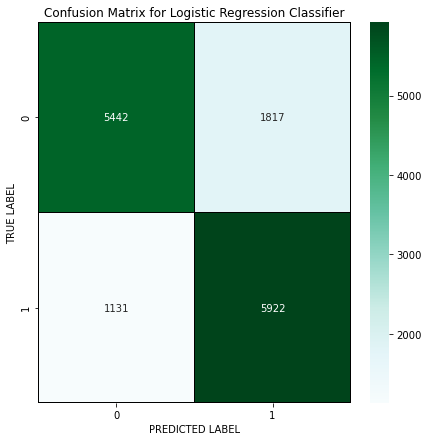

In [98]:
# Lets plot confusion matrix for Logistic Regression
cm = confusion_matrix(y_test,predLR)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Logistic Regression Classifier')
plt.show()


# KNeighbors Classifier


In [99]:
# Checking accuracy for KNeighbors Classifier
knn = KNN()
knn.fit(x_train,y_train)

# Prediction
predknn = knn.predict(x_test)

print(accuracy_score(y_test, predknn))
print(confusion_matrix(y_test, predknn))
print(classification_report(y_test,predknn))


0.8391559530463947
[[5519 1740]
 [ 562 6491]]
              precision    recall  f1-score   support

           0       0.91      0.76      0.83      7259
           1       0.79      0.92      0.85      7053

    accuracy                           0.84     14312
   macro avg       0.85      0.84      0.84     14312
weighted avg       0.85      0.84      0.84     14312



The accuracy using KNN is 83.91%



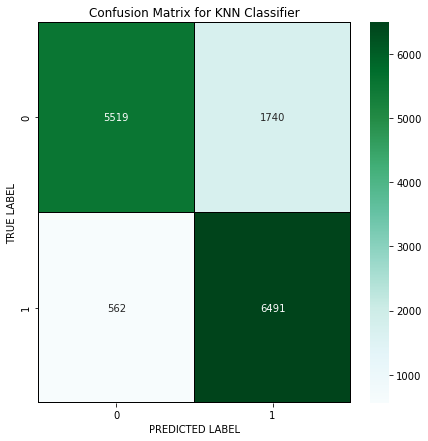

In [100]:
# Lets plot confusion matrix for KNN Classifier
cm = confusion_matrix(y_test,predknn)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for KNN Classifier')
plt.show()


# Gradient Boosting Classifier


In [101]:
# Checking accuracy for Gradient Boosting Classifier
GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)

# Prediction
predGB = GB.predict(x_test)

print(accuracy_score(y_test, predGB))
print(confusion_matrix(y_test, predGB))
print(classification_report(y_test,predGB))


0.8511738401341532
[[5826 1433]
 [ 697 6356]]
              precision    recall  f1-score   support

           0       0.89      0.80      0.85      7259
           1       0.82      0.90      0.86      7053

    accuracy                           0.85     14312
   macro avg       0.85      0.85      0.85     14312
weighted avg       0.86      0.85      0.85     14312



The accuracy using Gradient Boosting Classifier is 85.11%.



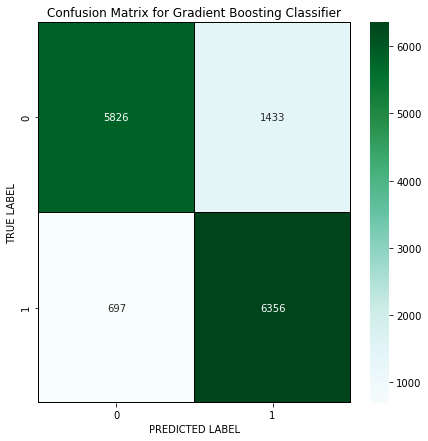

In [102]:
# Lets plot confusion matrix for Gradient Boosting Classifier
cm = confusion_matrix(y_test,predGB)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.show()


# XGBClassifier


In [103]:
# Checking accuracy for XGBClassifier
XGB=XGBClassifier()
XGB.fit(x_train,y_train)

#Prediction
predXG=XGB.predict(x_test)
print('Accuracy Score:',accuracy_score(y_test, predXG))
print('Confusion Matrix:',confusion_matrix(y_test, predXG))
print(classification_report(y_test,predXG))


[15:29:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Score: 0.8831749580771381
Confusion Matrix: [[6311  948]
 [ 724 6329]]
              precision    recall  f1-score   support

           0       0.90      0.87      0.88      7259
           1       0.87      0.90      0.88      7053

    accuracy                           0.88     14312
   macro avg       0.88      0.88      0.88     14312
weighted avg       0.88      0.88      0.88     14312



The accuracy using XGB Classifier is 88.33%.



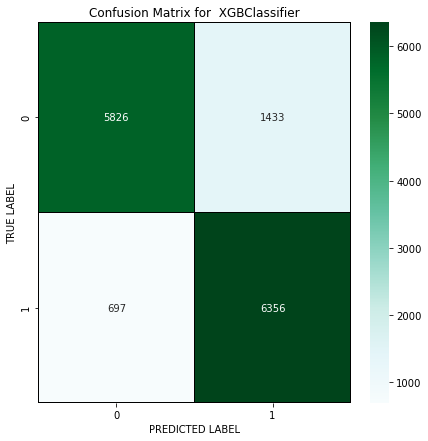

In [104]:
# Lets plot confusion matrix for  XGBClassifier
cm = confusion_matrix(y_test,predGB)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  XGBClassifier')
plt.show()


# ExtraTrees Classifier


In [105]:
from sklearn.ensemble import ExtraTreesClassifier
XT=ExtraTreesClassifier()
XT.fit(x_train,y_train)

#Prediction
predXT=XT.predict(x_test)
print('Accuracy Score:',accuracy_score(y_test, predXT))
print('Confusion Matrix:',confusion_matrix(y_test, predXT))
print(classification_report(y_test,predXT))


Accuracy Score: 0.8831749580771381
Confusion Matrix: [[6219 1040]
 [ 632 6421]]
              precision    recall  f1-score   support

           0       0.91      0.86      0.88      7259
           1       0.86      0.91      0.88      7053

    accuracy                           0.88     14312
   macro avg       0.88      0.88      0.88     14312
weighted avg       0.88      0.88      0.88     14312



The accuracy using Extra tree classifier is 88.31%

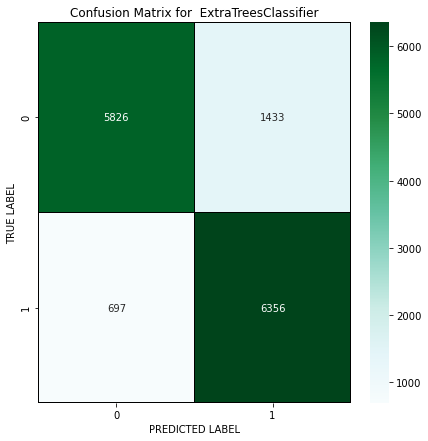

In [106]:
cm = confusion_matrix(y_test,predGB)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  ExtraTreesClassifier')
plt.show()


# Checking the Cross Validation Score


In [107]:
from sklearn.model_selection import cross_val_score


In [108]:
# cv score for Decision Tree Classifier
print(cross_val_score(DTC,x,y,cv=5).mean())


0.8354942895459987


In [109]:
# cv score for Random Forest Classifier
print(cross_val_score(RFC,x,y,cv=5).mean())


0.8817355564005546


In [110]:
# cv score for Logistic Regression Classifier
print(cross_val_score(LR,x,y,cv=5).mean())


0.7950364246695267


In [111]:
# cv score for KNN Classifier
print(cross_val_score(knn,x,y,cv=5).mean())


0.8468961004950097


In [112]:
# cv score for Gradient Boosting Classifier
print(cross_val_score(GB,x,y,cv=5).mean())


0.8482171781171625


In [113]:
# cv score for  XGBClassifier
print(cross_val_score(XGB,x,y,cv=5).mean())


[15:34:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:34:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:34:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:34:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [114]:
# cv score for  ExtraTreesClassifier
print(cross_val_score(XT,x,y,cv=5).mean())


0.8915661145905378


Above are the cross validation scores for the models used.

From the difference between the accuracy score and the CV score we can conclude that Decision Tree Classifier as our best fitting model.



# Hyper Parameter Tuning


In [116]:
from sklearn.model_selection import GridSearchCV


In [117]:
# Decision Tree Classifier

parameters = {'criterion':["gini","entropy"],
              'max_features':['auto','sqrt', 'log2'],
              'max_depth':[10,20,30,40,50],
              'splitter':['best','random']}


In [118]:
GCV=GridSearchCV(DecisionTreeClassifier(),parameters,cv=5)


In [119]:
GCV.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30, 40, 50],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']})

In [120]:
GCV.best_params_


{'criterion': 'entropy',
 'max_depth': 20,
 'max_features': 'auto',
 'splitter': 'best'}

In [122]:
census = DecisionTreeClassifier(criterion='entropy', max_depth=20, max_features='sqrt',splitter='best')
census.fit(x_train, y_train)
pred = census.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)


83.18194522079374


The accuracy of the best model is increased after tuning and is giving 83.18% accuracy.



# Plotting ROC and compare AUC for all the models used


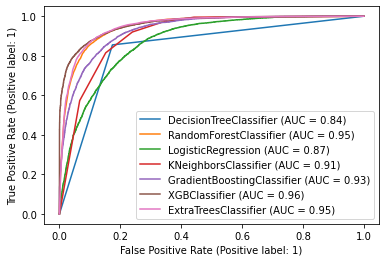

In [123]:
# Plotting for all the models used here
from sklearn import datasets 
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve 


disp = plot_roc_curve(DTC,x_test,y_test)
plot_roc_curve(RFC, x_test, y_test, ax=disp.ax_)     # ax_=Axes with confusion matrix
plot_roc_curve(LR, x_test, y_test, ax=disp.ax_)
plot_roc_curve(knn, x_test, y_test, ax=disp.ax_)
plot_roc_curve(GB, x_test, y_test, ax=disp.ax_)
plot_roc_curve(XGB, x_test, y_test, ax=disp.ax_)
plot_roc_curve(XT, x_test, y_test, ax=disp.ax_)


This is the AUC-ROC curve for the models that we have used and is plotted False positive rate against True positive rate.



# Plotting ROC and Compare AUC for the best model


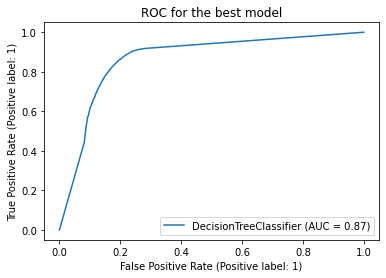

In [124]:
# Let's check the Auc for the best model after hyper parameter tuning
plot_roc_curve(census, x_test, y_test)
plt.title("ROC for the best model")
plt.show()


The Auc for the best model is 0.87.



# Saving The Model


In [125]:
# Saving the model using .pkl
import joblib
joblib.dump(census,"Census Income Prediction.pkl")


['Census Income Prediction.pkl']

# Predicting the saved model


In [126]:
# Let's load the saved model and get the prediction

# Loading the saved model
model=joblib.load("Census Income Prediction.pkl")

#Prediction
prediction = model.predict(x_test)
prediction


array([0, 1, 0, ..., 0, 1, 1])

In [127]:
pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"]).T


,Predicted,Original
0,0,1
1,1,1
2,0,0
3,0,0
4,1,1
...,...,...
14307,0,0
14308,0,0
14309,0,0
14310,1,0


The predicted and actual values are almost same.

